C:\Users\david\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Algorithm,Path Length,Explored Count,Computational Time (s),Max Open Set Size,Nodes Generated
0,A*,39,39,0.000543,23,62
1,Greedy,39,40,0.000687,28,68


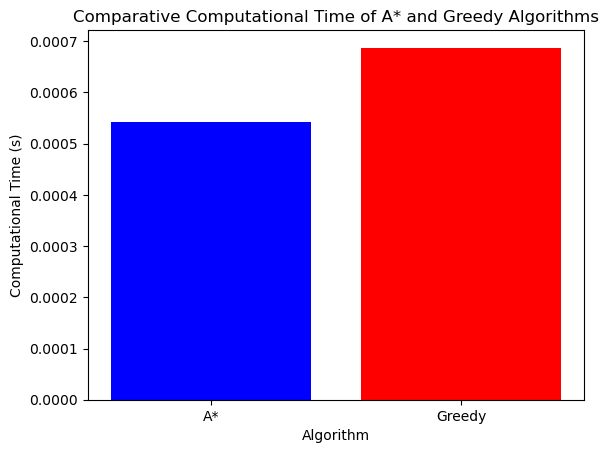

In [1]:
import pandas as pd
from pyamaze import maze, agent, textLabel
from queue import PriorityQueue
import math
import timeit
import matplotlib.pyplot as plt
import pandas as pd

def manhattandistance(cell1, cell2):
    # calculating Manhattan distance as heuristic
    x1, y1 = cell1
    x2, y2 = cell2
    return abs(x1 - x2) + abs(y1 - y2)

def func_get_neighbors(cell, m):
    """
    Get valid neighbors of a cell in the maze.

    :param cell: A tuple (x, y) representing the current cell coordinates.
    :param m: The maze object.
    :return: A list of tuples representing valid neighbor cells.
    """
    x, y = cell
    neighbors = []

    # Directions: East, South, West, North
    directions = {'E': (0, 1), 'S': (1, 0), 'W': (0, -1), 'N': (-1, 0)}

    for direction in directions:
        dx, dy = directions[direction]
        new_x, new_y = x + dx, y + dy

        if m.maze_map[cell][direction]:
            neighbors.append((new_x, new_y))

    return neighbors

def GreedyBestFirstSearch(m):
    start = (m.rows, m.cols)
    goal = (1, 1)

    f_score = {cell: float('inf') for cell in m.grid}
    f_score[start] = manhattandistance(start, goal)

    open_set = PriorityQueue()
    open_set.put((f_score[start], start))
    open_set_hash = {start}

    came_from = {}
    explored = set()

    max_open_set_size = 0  # To track the maximum size of the open set

    while not open_set.empty():
        current = open_set.get()[1]
        open_set_hash.remove(current)
        explored.add(current)

        # Update the max open set size
        max_open_set_size = max(max_open_set_size, len(open_set_hash))

        if current == goal:
            break

        for neighbor in func_get_neighbors(current, m):
            if neighbor not in explored:
                came_from[neighbor] = current
                f_score[neighbor] = manhattandistance(neighbor, goal)
                if neighbor not in open_set_hash:
                    open_set.put((f_score[neighbor], neighbor))
                    open_set_hash.add(neighbor)

    # Reconstruct path
    path = {}
    current = goal
    while current != start:
        previous = came_from.get(current)
        if previous is None:
            break  # No path found
        path[previous] = current
        current = previous

    nodes_generated = len(explored) + len(open_set_hash)
    return path, explored, max_open_set_size, nodes_generated

def AStarAlgo(m):
    start = (m.rows, m.cols)
    goal = (1, 1)

    max_open_set_size = 0  # To track the maximum size of the open set

    g_score = {cell: float('inf') for cell in m.grid}
    g_score[start] = 0

    f_score = {cell: float('inf') for cell in m.grid}
    f_score[start] = manhattandistance(start, goal)

    open_set = PriorityQueue()
    open_set.put((f_score[start], start))
    open_set_hash = {start}  # To keep track of items in PriorityQueue for O(1) access

    came_from = {}
    explored = set()  # To keep track of explored nodes

    while not open_set.empty():
        current = open_set.get()[1]
        open_set_hash.remove(current)
        explored.add(current)

        # Update the max open set size
        max_open_set_size = max(max_open_set_size, len(open_set_hash))

        if current == goal:
            break

        for neighbor in func_get_neighbors(current, m):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + manhattandistance(neighbor, goal)
                if neighbor not in open_set_hash:
                    open_set.put((f_score[neighbor], neighbor))
                    open_set_hash.add(neighbor)

    # Reconstruct path
    path = {}
    current = goal
    while current != start:
        previous = came_from.get(current)
        if previous is None:
            break  # No path found
        path[previous] = current
        current = previous

    nodes_generated = len(explored) + len(open_set_hash)  # Total number of nodes generated
    return path, explored, max_open_set_size, nodes_generated


def create_table(path_AStar, path_Greedy, explored_count_AStar, explored_count_Greedy, 
                 comp_time_AStar, comp_time_Greedy, max_open_set_size_AStar, max_open_set_size_Greedy, 
                 nodes_generated_AStar, nodes_generated_Greedy):
    """
    Creating a table of metrics for the A* and Greedy Best-First Search algorithms.
    """
    df = pd.DataFrame({
        'Algorithm': ['A*', 'Greedy'],
        'Path Length': [len(path_AStar) + 1, len(path_Greedy) + 1],
        'Explored Count': [explored_count_AStar, explored_count_Greedy],
        'Computational Time (s)': [comp_time_AStar, comp_time_Greedy],
        'Max Open Set Size': [max_open_set_size_AStar, max_open_set_size_Greedy],
        'Nodes Generated': [nodes_generated_AStar, nodes_generated_Greedy]
    })
    return df


def create_chart(df):
    """
    Create and display a comparative chart of computational time for the A* and Greedy algorithms.
    """
    fig, ax = plt.subplots()
    ax.bar(df['Algorithm'], df['Computational Time (s)'], color=['blue', 'red'])
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Computational Time (s)')
    ax.set_title('Comparative Computational Time of A* and Greedy Algorithms')
    plt.savefig('AlgorithmComparison.png')
    plt.show()

if __name__ == '__main__':
    maze_size = 20  # Increase the size of the maze for more complexity
    m1 = maze(maze_size, maze_size)
    m1.CreateMaze(loopPercent=100)  # loopPercent adds loops to the maze for complexity

    # A* Algorithm
    timer_start = timeit.default_timer()
    path_AStar, explored_AStar, max_open_set_size_AStar, nodes_generated_AStar = AStarAlgo(m1)
    comp_time_AStar = timeit.default_timer() - timer_start

    # Visualization and Metrics for A*
    a_AStar = agent(m1, footprints=True, color='blue')
    m1.tracePath({a_AStar: path_AStar})
    l_AStar = textLabel(m1, 'A* Path Length', len(path_AStar) + 1)

    # Run the A* algorithm maze
    m1.run()

    m2 = maze(maze_size, maze_size)
    m2.CreateMaze(loopPercent=100, theme='light') 
    # Greedy Best-First Search
    timer_start = timeit.default_timer()
    path_Greedy, explored_Greedy, max_open_set_size_Greedy, nodes_generated_Greedy = GreedyBestFirstSearch(m2)
    comp_time_Greedy = timeit.default_timer() - timer_start

    # Visualization and Metrics for Greedy
    a_Greedy = agent(m2, footprints=True, color='red')
    m2.tracePath({a_Greedy: path_Greedy})
    l_Greedy = textLabel(m2, 'Greedy Path Length', len(path_Greedy) + 1)

    # Run the Greedy algorithm maze
    m2.run()

    # Now create the comparison table and chart
    table = create_table(
        path_AStar, path_Greedy, 
        len(explored_AStar), len(explored_Greedy), 
        comp_time_AStar, comp_time_Greedy, 
        max_open_set_size_AStar, max_open_set_size_Greedy, 
        nodes_generated_AStar, nodes_generated_Greedy
    )

    display(table)

    # Create and display the chart
    create_chart(table)